# Apple cultivars

* **Data:** `apples.csv`
* **Description:** Types of apples
* **Source:** https://en.wikipedia.org/wiki/List_of_apple_cultivars
* **Columns of interest:**
    * `Common name` - the non-scientific name of the apple cultivar
    * `Origin` - where it came from
    * `First developed` - year it was developed
    * `Comment` - Description
    * `Use` - whether best for eating, baking, etc

Note that you'll need to brush up on `.str.contains` for this notebook.

## Read in your data

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
# pd.set_option("display.float_format", '{:,}'.format)
df = pd.read_csv('apples.csv')
df.head()

/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Common name,Origin,First developed,Comment,Use
0,Abram,US,1850,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,Introduced 1941,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,Introduced 1826,A dessert apple. First introduced under the na...,Eating
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating


## Clean up the "First developed" column

Sometimes it's a year and sometimes it is an "introduced" year, like `Introduced 1826`. We just want all of them to be years, so feel free to remove the "Introduced" part.

In [2]:
df['First developed'] = df['First developed'].str.replace('Introduced', '')
df

,Common name,Origin,First developed,Comment,Use
0,Abram,US,1850,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,1941,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,1826,A dessert apple. First introduced under the na...,Eating
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating
...,...,...,...,...,...
1196,Zimska Kolačara,Serbia,1900,"A greenish yellow apple. W 55-65, H 65-75, We ...","Eating, Cooking, Pie"
1197,Zoar Greening,US,1865,"Flesh white, tender, juicy, subacid, good. Use...",Eating
1198,Ökna Lökäpple,Sweden,1830,"Greenish yellow with some red stripes. H 50, W...",Eating
1199,Ökna vita Vintergylling,Sweden,1900,"A small yellow conical apple. H 60, W 60. Use ...","Cooking, Eating."


## What percentage of apples are just for eating?

In [3]:
# df.Use.str.contains('Eating', regex=False).value_counts(normalize=True) * 100
df.Use.value_counts(normalize=True) * 100

Eating                           57.545455
Cooking                          13.090909
Cooking, Eating                   9.454545
Eating, Cooking                   5.909091
Cider                             1.090909
                                   ...    
Cooking (Apple Juice), Eating     0.090909
Cider, Cooking Eating             0.090909
Eating, Cooking, Drying           0.090909
Cooking, (Eating)                 0.090909
Eating, cider, juice              0.090909
Name: Use, Length: 72, dtype: float64

## Apples are from Kazakhstan, but they've spread since ancient times: calculate the top seven countries for apple cultivars in this dataset

In [4]:
df.Origin.value_counts().head(7)

US         321
England    278
Germany     75
France      38
Sweden      35
Canada      32
Russia      17
Name: Origin, dtype: int64

## Plot them with the longest bar at the top

<AxesSubplot:>

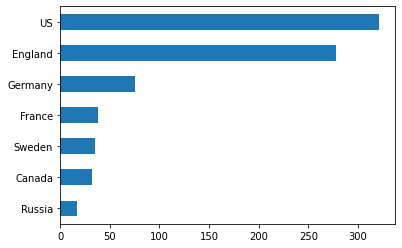

In [5]:
df.Origin.value_counts().head(7).sort_values().plot(kind='barh')

## For apples described as "small" in their comment section, how often are they just for eating?

In [6]:
df.head()

,Common name,Origin,First developed,Comment,Use
0,Abram,US,1850,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,1941,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,1826,A dessert apple. First introduced under the na...,Eating
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating


In [14]:
# df.Use == 'Eating'

df.Comment.str.contains('small', regex=False)[df.Use == 'Eating'].value_counts()

# Your answer is actually answering
# "For apples that are just for eating, how often are they small?" -
# but it's less an issue about correctness and more an issue about how your code is structured.
# I think it's kind of the same as the previous note about filtering first, 
# but for this one you want: 
df[df.Comment.str.contains("small", na=False)].Use.value_counts()
# Since the code *does* run and it doesn't give you any warnings 
# that something crazy might be happening, I think the key to getting
# better at these kinds of questions is doing some more notebooks and having a tight feedback loop on them. 

False    607
True      22
Name: Comment, dtype: int64

## Save a CSV of just apples from Sweden, calling it `sweden.csv`

In [8]:
df[df.Origin == 'Sweden'].to_csv('sweden.csv')

## What was the first apple cultivar from Japan?

In [9]:
df['First developed'] = df['First developed'].dropna().astype(int)

df[df.Origin == 'Japan'].sort_values(by='First developed').head()



,Common name,Origin,First developed,Comment,Use
1122,Washu 1984,Japan,1920.0,Conical with light green skin and dark freckle...,Eating
244,Crispin,Japan,1930.0,See Mutsu,Eating
400,Fuji,Japan,1930.0,"P Red Delicious × Ralls Genet. Dark red, conic...",Eating
749,Mutsu,Japan,1930.0,"Known as ""Crispin"" in the United Kingdom. W 73...",Eating
1087,Tsugaru,Japan,1930.0,Golden Delicious × Jonathan,Eating


## How old are these apple cultivars?

You could use `.describe()`, but I want a graph. **What kind of chart do you use?** I want to see a graph that shows me a summary when these cultivars were discovered/introduced, not a graph of each individual one's year of introduction.

In [10]:
df['age'] = 2021 - df['First developed']
df.head()


,Common name,Origin,First developed,Comment,Use,age
0,Abram,US,1850.0,"A small apple with red flush. Flesh white, ten...",Eating,171.0
1,Acheson,Canada,1941.0,"Fruit large, greenish yellow. P Delicious x un...",Eating,80.0
2,Acklam Russet,England,1768.0,A small russet apple. An excellent dessert app...,Eating,253.0
3,Adams Pearmain,England,1826.0,A dessert apple. First introduced under the na...,Eating,195.0
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating,NaN


<AxesSubplot:ylabel='Common name'>

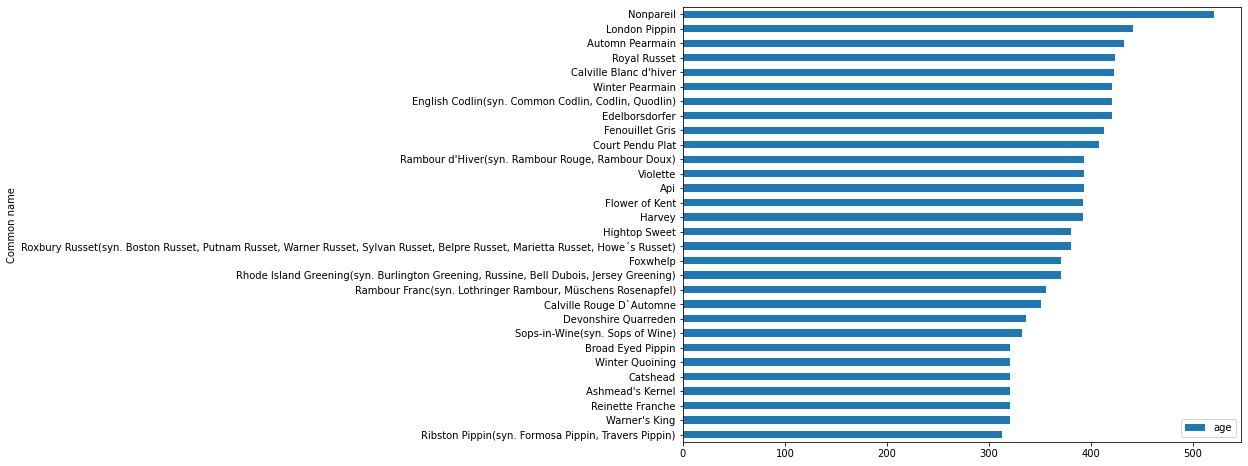

In [11]:
df.sort_values(by='age').dropna().tail(30).plot(x='Common name', y='age', kind='barh', figsize=(10,8))




## How old are most apple cultivars that are used for creating cider?

Cider used to be a big deal, so I would assume they're older. Include **anything that includes "Cider" anywhere in the `Use` description**. Make a graph, same as the last question.

In [12]:
#df.info()


<AxesSubplot:>

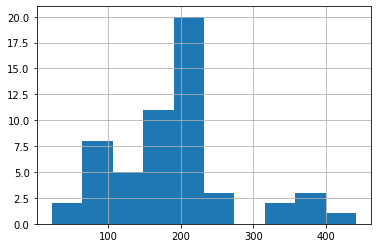

In [17]:
df['cider_apples'] = df.Use.str.contains('Cider', regex=False)

df.sort_values(by='age').head(1000)#.Use.str.contains('Cider', regex=False)

# df.sort_values(by='age').Use.str.contains('Cider')

# I was looking for 
df[df.Use.str.contains('Cider', na=False)].age.hist()
# but your answer was in the right direction. 
# Although - one issue is that 
# you did `.dropna()` before you graphed, which is going to remove rows with NaN *anywhere*,
# so if they were missing (for example) a comment about their use, 
# you wouldn't have its age be graphed.